In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.get_option("display.max_columns")
import seaborn as sns
#import rgb2hex




In [22]:
df = pd.read_csv('../data/clean/deliveries.csv')
df.dtypes

id                        object
route_id                  object
state                      int64
_status                   object
items                     object
total_size                 int64
pickupLat                float64
pickupLng                float64
deliveryLat              float64
deliveryLng              float64
pickup_dt                 object
max_pickup_dt             object
pickup_arrival_dt         object
pickup_effective_dt       object
delivery_dt               object
max_delivery_dt           object
delivery_arrival_dt       object
delivery_effective_dt     object
cost                     float64
final_price              float64
distance                 float64
shipper_id               float64
distance_charged         float64
distance_route           float64
total_package_price      float64
vehicle_capacity         float64
dtype: object

In [23]:
df['pickup_arrival_dt'] = pd.to_datetime(df['pickup_arrival_dt']).dt.tz_localize('UTC').dt.tz_convert('America/Fortaleza')
df['delivery_arrival_dt'] = pd.to_datetime(df['delivery_arrival_dt']).dt.tz_localize('UTC').dt.tz_convert('America/Fortaleza')
df['week_day_pickup'] = df['pickup_arrival_dt'].dt.day_name()
df['week_day_delivery'] = df['delivery_arrival_dt'].dt.day_name()


In [24]:
pickup_per_day = df.groupby('week_day_pickup')['id'].count().reset_index()
pickup_per_day.columns = ['week_day_pickup', 'pickups_per_day']
pickup_per_day.head()

,week_day_pickup,pickups_per_day
0,Friday,12952
1,Monday,20209
2,Saturday,7310
3,Sunday,2334
4,Thursday,13148


In [25]:
deliveries_per_day = df.groupby('week_day_delivery')['id'].count().reset_index()
deliveries_per_day.columns = ['week_day_delivery', 'deliveries_per_day']
# sort by week_day_delivery
deliveries_per_day = deliveries_per_day.sort_values(by='deliveries_per_day', ascending=False)
deliveries_per_day.head()

,week_day_delivery,deliveries_per_day
1,Monday,19644
5,Tuesday,18400
6,Wednesday,16282
4,Thursday,13686
0,Friday,13052


Text(0, 0.5, 'Number of pickups')

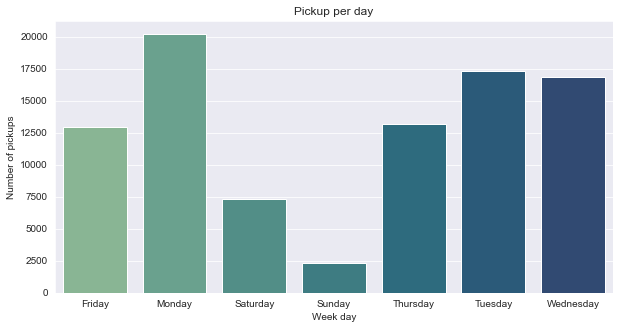

In [26]:
# barplot og week_day_pickup
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='week_day_pickup', y='pickups_per_day', data=pickup_per_day, ax=ax, palette='crest')
ax.set_title('Pickup per day')
ax.set_xlabel('Week day')
ax.set_ylabel('Number of pickups')

Text(0, 0.5, 'Week day')

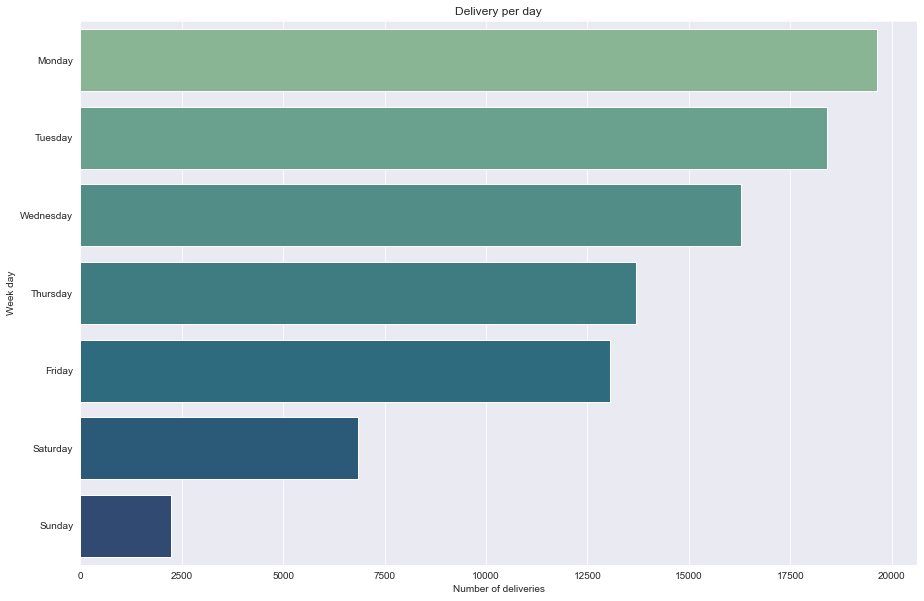

In [27]:
# bar plot of week_day_delivery
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='deliveries_per_day', y='week_day_delivery', data=deliveries_per_day, ax=ax,  palette='crest')
ax.set_title('Delivery per day')
ax.set_xlabel('Number of deliveries')
ax.set_ylabel('Week day')


In [29]:
df2 = df.loc[df['pickup_arrival_dt'] <= '2022-05-31', ['id', 'pickup_arrival_dt', 'delivery_arrival_dt']]
df2_activity_pickup = df2.groupby([pd.Grouper(key='pickup_arrival_dt', freq='D')])['id'].count().reset_index()
df2_activity_delivery = df2.groupby([pd.Grouper(key='delivery_arrival_dt', freq='D')])['id'].count().reset_index()
df2_activity_pickup.columns = ['day', 'pickups_per_day']
df2_activity_delivery.columns = ['day', 'deliveries_per_day']
df_total_activity = pd.merge(df2_activity_pickup, df2_activity_delivery, on='day', how='inner')
df_total_activity['total_activity'] = df_total_activity['pickups_per_day'] + df_total_activity['deliveries_per_day']
## format day to number of calendar day
df_total_activity['day'] = df_total_activity['day'].dt.day

df_total_activity.head()

,day,pickups_per_day,deliveries_per_day,total_activity
0,1,115,95,210
1,2,4326,3816,8142
2,3,3619,3914,7533
3,4,4884,4285,9169
4,5,3847,4178,8025


In [30]:
df_total_activity['pickups_per_day'].sum()

84944

In [31]:
df_total_activity['deliveries_per_day'].sum()


84624

Text(0, 0.5, 'Activity')

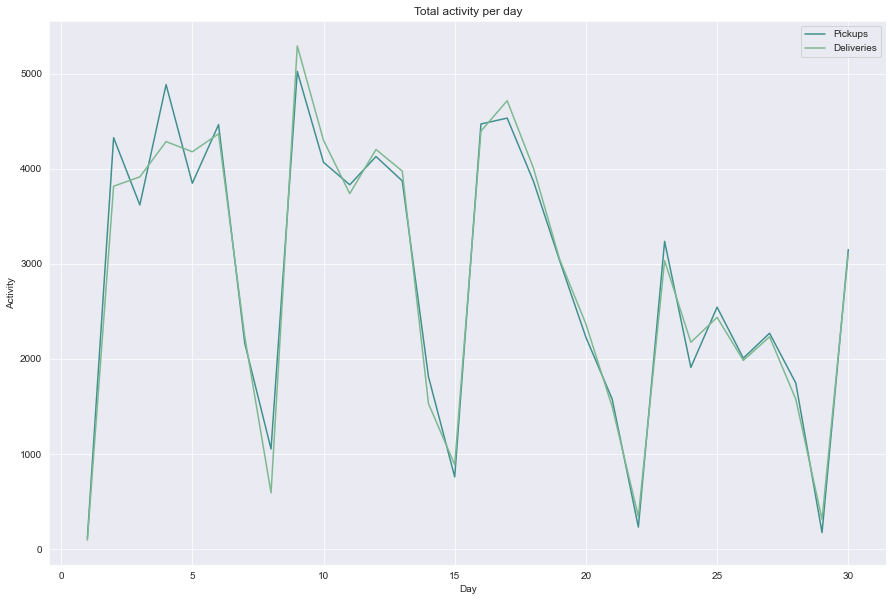

In [40]:
## line plot total deliveries per day
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='day', y='pickups_per_day', data=df_total_activity,  markers=True, dashes=False, ax=ax , color='#3f908e')
sns.lineplot(x='day', y='deliveries_per_day', data=df_total_activity,  markers=True, dashes=False, ax=ax , color='#7cb990')
ax.legend(['Pickups', 'Deliveries'])
max_delivery = df_total_activity['deliveries_per_day'].max()
max_pickup = df_total_activity['pickups_per_day'].max()
ax.set_title('Total activity per day')
ax.set_xlabel('Day')
ax.set_ylabel('Activity')



In [106]:
df3 = df.loc[:, ['id','route_id', 'delivery_effective_dt', 'max_delivery_dt']]
df3['delivery_effective_dt'] = pd.to_datetime(df3['delivery_effective_dt'])
df3['max_delivery_dt'] = pd.to_datetime(df3['max_delivery_dt'])
df3['delay'] = (df3['delivery_effective_dt'] - df3['max_delivery_dt']).dt.total_seconds() / 3600
df3['has_delay'] = df3['delay'] > 0
df3.head()

,id,route_id,delivery_effective_dt,max_delivery_dt,delay,has_delay
0,t-amabrt-1743660,r-shiinc-1248026,2022-05-02 15:52:13,2022-05-02 15:41:51,0.172778,True
1,t-amabrt-1743661,r-shiinc-1248060,2022-05-02 17:16:29,2022-05-02 22:49:38,-5.552500,False
2,t-amabrt-1743662,r-shiinc-1248042,2022-05-02 19:14:19,2022-05-03 07:05:17,-11.849444,False
3,t-amabrt-1743663,r-shiinc-1248032,2022-05-02 20:56:31,2022-05-03 08:14:19,-11.296667,False
4,t-amabrt-1743664,r-shiinc-1248067,2022-05-02 17:27:24,2022-05-03 07:43:08,-14.262222,False


In [107]:
df_routes = pd.read_csv('../data/clean/routes.csv')
df_final = pd.merge(df3, df_routes, on='route_id', how='inner')
df_per_capacity = df_final.groupby('route_capacity').agg({'id': 'count', 'has_delay': 'sum'}).reset_index()
df_per_capacity.columns = ['route_capacity', 'total_deliveries', 'total_deliveries_with_delay']
df_per_capacity['percentage'] = ((df_per_capacity['total_deliveries_with_delay'] / df_per_capacity['total_deliveries'])*100).round(2)
#sort by percentage
df_per_capacity = df_per_capacity.sort_values(by='percentage', ascending=False)

df_per_capacity

,route_capacity,total_deliveries,total_deliveries_with_delay,percentage
0,1,10,9,90.00
1,2,793,365,46.03
3,4,1664,628,37.74
4,5,178,52,29.21
2,3,87509,22408,25.61


In [99]:
def set_vehicle_type(x):
    if x == 1:
        return 'Bicycle'
    elif x == 2:
        return 'Motorcycle'
    elif x == 3:
        return 'Car'
    elif x == 4:
        return 'Van'
    else:
        return 'Truck'

df_per_capacity['vehicle_type'] = df_per_capacity['route_capacity'].apply(set_vehicle_type)
df_per_capacity

,route_capacity,total_deliveries,total_deliveries_with_delay,percentage,vehicle_type
0,1,10,9,90.00,Bicycle
1,2,793,365,46.03,Motorcycle
3,4,1664,628,37.74,Van
4,5,178,52,29.21,Truck
2,3,87509,22408,25.61,Car


(0.0, 100.0)

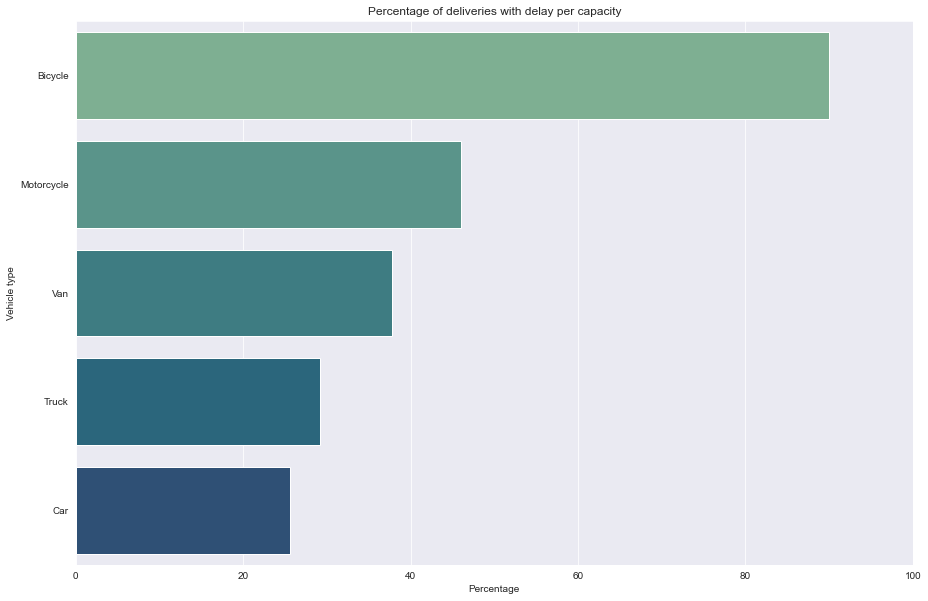

In [102]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='percentage', y='vehicle_type', data=df_per_capacity, ax=ax, palette='crest')
ax.set_title('Percentage of deliveries with delay per capacity')
ax.set_xlabel('Percentage')
ax.set_ylabel('Vehicle type')
## limit on x
ax.set_xlim(0, 100)

In [54]:
##obtain hex colors of palette
palette = sns.color_palette('crest')
hex_palette = ['#{:02x}{:02x}{:02x}'.format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)) for rgb in palette]
hex_palette

['#7cb990', '#58a590', '#3f908e', '#277a8b', '#1c6388', '#254a7f']